
# 4.4: Animating HNN simulations

This example demonstrates how to animate HNN simulations


In [1]:
# Author: Nick Tolley <nicholas_tolley@brown.edu>

First, we'll import the necessary modules for instantiating a network and
running a simulation that we would like to animate.



In [2]:
import os.path as op

import matplotlib.pyplot as plt

import hnn_core
from hnn_core import jones_2009_model, simulate_dipole, read_params
from hnn_core.network_models import add_erp_drives_to_jones_model

--No graphics will be displayed.


We begin by instantiating the network. For this example, we will reduce the
number of cells in the network to speed up the simulations.



In [3]:
net = jones_2009_model(mesh_shape=(3, 3))

# Note that we move the cells further apart to allow better visualization of
# the network (default inplane_distance=1.0 µm).
net.set_cell_positions(inplane_distance=300)

The 
[NetworkPlotter](https://jonescompneurolab.github.io/hnn-core/stable/generated/hnn_core.viz.NetworkPlotter.html#hnn_core.viz.NetworkPlotter)
class can be used to visualize the 3D structure of the network.

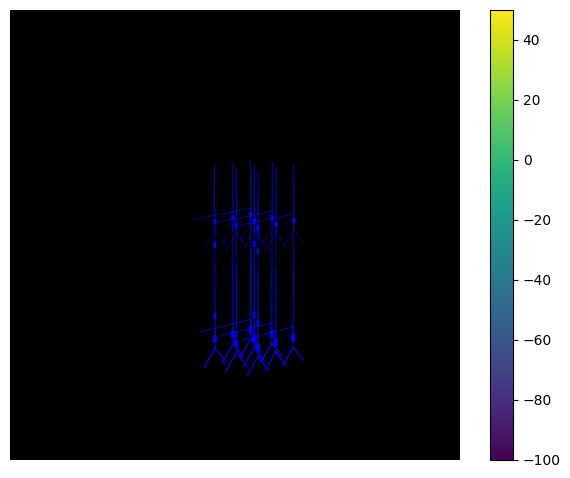

In [4]:
from hnn_core.viz import NetworkPlotter

net_plot = NetworkPlotter(net)

We can also visualize the network from another angle by adjusting the
azimuth and elevation parameters.



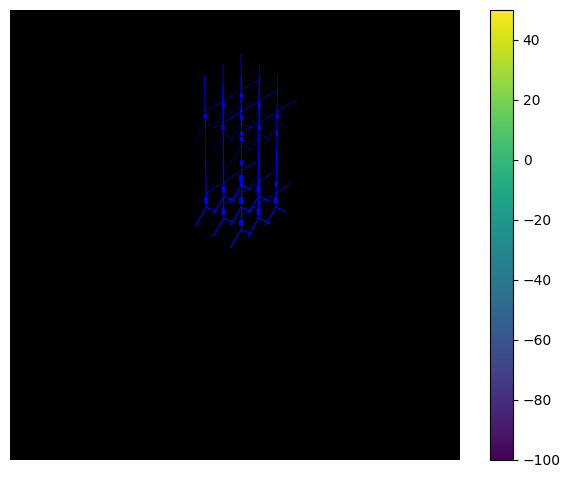

In [5]:
net_plot.azim = 45
net_plot.elev = 40
net_plot.fig

Next we add event related potential (ERP) producing drives to the network
and run the simulation (see the
[ERP simulation](https://jonescompneurolab.github.io/textbook/content/05_erps/hnn_core.html)
for more details).
To visualize the membrane potential of cells in the
network, we need to pass `record_vsec='all'` to `simulate_dipole(...)`, which turns
on the recording of voltages in all sections of all cells in the network.

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/austinsoplata/rep/brn/hnn-core/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


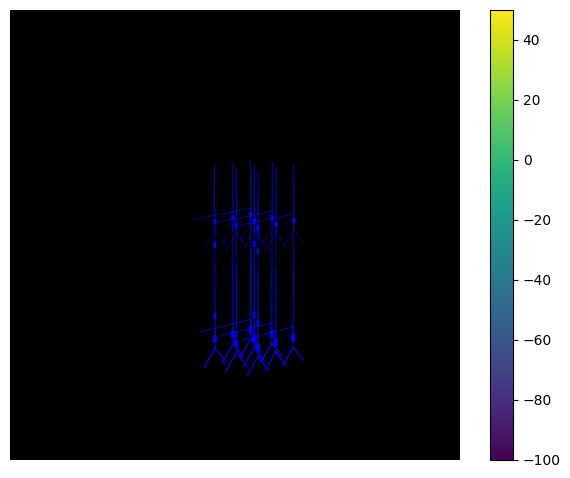

In [6]:
add_erp_drives_to_jones_model(net)
dpl = simulate_dipole(net, tstop=170, record_vsec='all')
net_plot = NetworkPlotter(net)  # Reinitialize plotter with simulated network

Finally, we can animate the simulation using the `export_movie()` method. We
can adjust the xyz limits of the plot to better visualize the network.



In [7]:
# # If you want to save the animation to a file, then uncomment the code in this cell.
# net_plot.xlim = (400, 1600)
# net_plot.ylim = (400, 1600)
# net_plot.zlim = (-500, 1600)
# net_plot.azim = 225
# net_plot.export_movie('animation_demo.gif', dpi=100, fps=30, interval=100)